<hr>


<span style="font-size:32px"><b>Apprentice Chef - Revenue Prediction Modeling</b></span><br><br>
<br>
<span style="font-size:28px"><b>Supervised Machine Learning </b></span><br>
<br>
<span style="font-size:18px">Jiehui Lin, MSBA </span><br>
<br>
<span style= "font-size:18px">Hult International Business School <span><br>

    
    
<hr>
<hr>


<b>Objective:</b>
<ul>
<li>Examine what are critical factors affect revenue generated for the meals delivery company Apprentice Chef </li>
<li>Build machine learning model to predict revenue over first year of each customer's life cycle</li>
</ul>

<b>Presumption:</b>
<ul>
<li> 90% of revenue comes from customers that have been ordered meals 12 months or less</li>
<li> A cleaned data set of approx 2000 customers is statistically sound and representative </li>
</ul>    

<h4><b>Data Loading and Verifying </h4><b>

In [1]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


original_df='Apprentice_Chef_Dataset.xlsx'
chef = pd.read_excel(original_df)

chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

In [2]:
chef.isnull().sum() # checking missing value

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

no effect on further analysis with missing value of family names 

<h4><b>Data Visualizing and Feature Engineering </h4><b>
    <h5> Numerical Variables </h5>

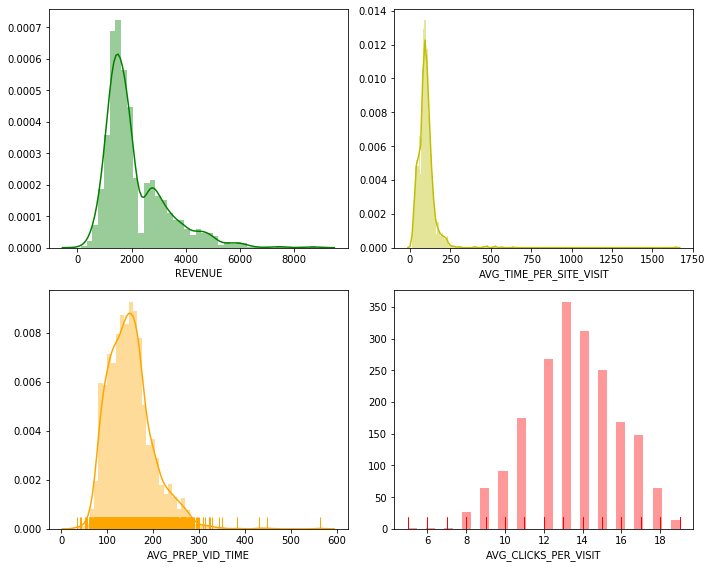

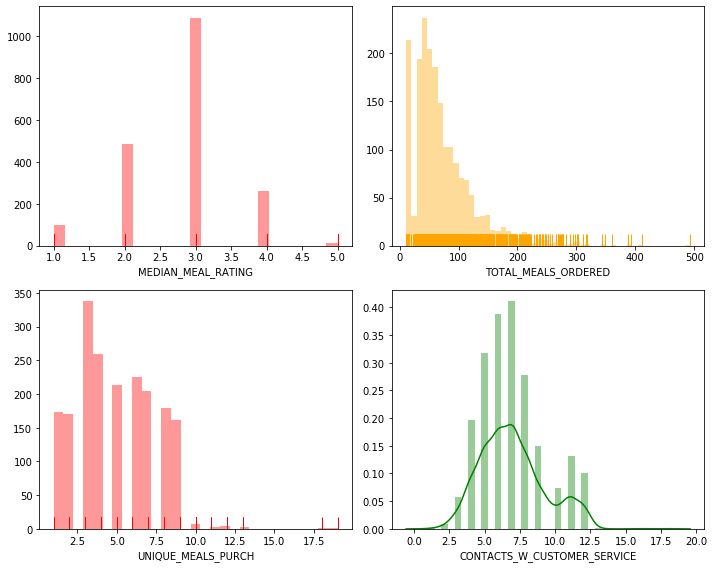

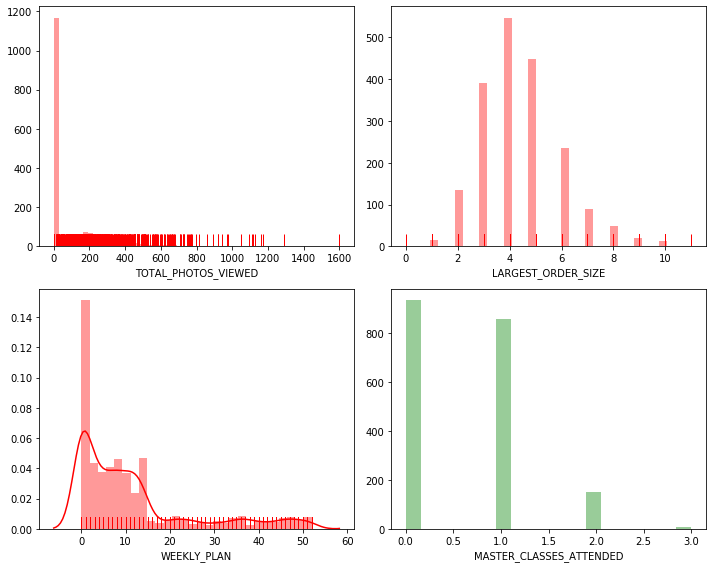

In [3]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

########################
plt.subplot(2, 2, 4)
sns.distplot(chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')
plt.tight_layout()
plt.show()

##########################
##########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')

###########################################

plt.subplot(2, 2, 2)
sns.distplot(chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

######################
######################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

########################
plt.subplot(2, 2, 3)
sns.distplot(chef['WEEKLY_PLAN'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde = False,
             color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
plt.show()


########################
########################


In [4]:
# cross checking quantile interval (0.05 - 0.95)

chef_g = chef.copy()

chef_g = chef.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis=1)
chef_g.quantile([0.025, 0.975])

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0.025,790.00,0.0,13.00,1.0,3.0,1.0,29.00000,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,79.1250,2.0,0.0,1.0,9.0,0.000
0.975,5006.75,1.0,221.75,9.0,12.0,10.0,212.23875,1.0,5.0,1.0,1.0,6.0,2.0,49.0,8.0,10.0,1.0,1.0,90.0,264.9375,8.0,2.0,4.0,18.0,608.125


In [5]:
# setting outlier thresholds
avg_time_pvisit_hi  = 212.2
avg_prep_vid_time_hi = 264.94
avg_prep_vid_time_lo = 79.13
avg_cli_pvisit_hi  = 18
avg_cli_pvisit_lo  = 9
tot_meals_ord_hi = 221.75
unique_meals_pur_hi = 9
contact_w_CS_hi = 12
contact_w_CS_lo = 3
cancel_b_noon_hi = 5
cancel_a_noon_hi = 1
mobile_log_hi = 6
mobile_log_lo = 5
pc_log_hi = 2
pc_log_lo = 1
weekly_plan_hi = 49
early_d_hi = 8
late_d_hi = 10
tot_photo_v_hi = 608.13
lar_ord_size_hi = 8
lar_ord_size_lo = 2
mas_class_att_hi = 2
med_meal_rat_hi =  4

In [6]:
# developing features (columns) for outliers

# Average Time per Visit 
chef['out_avg_time_pvisit'] = 0
condition_hi = chef.loc[0:,'out_avg_time_pvisit'][chef['AVG_TIME_PER_SITE_VISIT'] > avg_time_pvisit_hi]

chef['out_avg_time_pvisit'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# Average Prep Video Time
chef['out_avg_prep_video'] = 0
condition_hi = chef.loc[0:,'out_avg_prep_video'][chef['AVG_PREP_VID_TIME'] > avg_prep_vid_time_hi]
condition_lo = chef.loc[0:,'out_avg_prep_video'][chef['AVG_PREP_VID_TIME'] < avg_prep_vid_time_lo]

chef['out_avg_prep_video'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_avg_prep_video'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Average Clicks per Visit
chef['out_avg_clicks_pvisit'] = 0
condition_hi = chef.loc[0:,'out_avg_clicks_pvisit'][chef['AVG_CLICKS_PER_VISIT'] > avg_cli_pvisit_hi]
condition_lo = chef.loc[0:,'out_avg_clicks_pvisit'][chef['AVG_CLICKS_PER_VISIT'] < avg_cli_pvisit_lo]

chef['out_avg_clicks_pvisit'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_avg_clicks_pvisit'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Total Meals Ordered 
chef['out_tot_meals'] = 0
condition_hi = chef.loc[0:,'out_tot_meals'][chef['TOTAL_MEALS_ORDERED'] > tot_meals_ord_hi]

chef['out_tot_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)



# Unique Meals Purchase 
chef['out_uni_meals'] = 0
condition_hi = chef.loc[0:,'out_uni_meals'][chef['UNIQUE_MEALS_PURCH'] > unique_meals_pur_hi]

chef['out_uni_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)



# Contact with Customers Service
chef['out_contact_CS'] = 0
condition_hi = chef.loc[0:,'out_contact_CS'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > contact_w_CS_hi]
condition_lo = chef.loc[0:,'out_contact_CS'][chef['CONTACTS_W_CUSTOMER_SERVICE'] < contact_w_CS_lo]

chef['out_contact_CS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_contact_CS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



# Cancellation before Noon
chef['out_cancel_bnoon'] = 0
condition_hi = chef.loc[0:,'out_cancel_bnoon'][chef['CANCELLATIONS_BEFORE_NOON'] > cancel_b_noon_hi]

chef['out_cancel_bnoon'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancellation after Noon
chef['out_cancel_anoon'] = 0
condition_hi = chef.loc[0:,'out_cancel_anoon'][chef['CANCELLATIONS_AFTER_NOON'] > cancel_a_noon_hi]

chef['out_cancel_anoon'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# Mobile Login
chef['out_mobile_log'] = 0
condition_hi = chef.loc[0:,'out_mobile_log'][chef['MOBILE_LOGINS'] > mobile_log_hi]
condition_lo = chef.loc[0:,'out_mobile_log'][chef['MOBILE_LOGINS'] < mobile_log_lo]

chef['out_mobile_log'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_mobile_log'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# PC Login
chef['out_pc_log'] = 0
condition_hi = chef.loc[0:,'out_pc_log'][chef['PC_LOGINS'] > pc_log_hi]
condition_lo = chef.loc[0:,'out_pc_log'][chef['PC_LOGINS'] < pc_log_lo]

chef['out_pc_log'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_pc_log'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Weekly Plan
chef['out_weekly_plan'] = 0
condition_hi = chef.loc[0:,'out_weekly_plan'][chef['WEEKLY_PLAN'] > weekly_plan_hi]

chef['out_weekly_plan'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Early Deliveries
chef['out_early_d'] = 0
condition_hi = chef.loc[0:,'out_early_d'][chef['EARLY_DELIVERIES'] > early_d_hi]

chef['out_early_d'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late Deliveries
chef['out_late_d'] = 0
condition_hi = chef.loc[0:,'out_late_d'][chef['LATE_DELIVERIES'] > late_d_hi]

chef['out_late_d'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
# Total Photo Viewed
chef['out_tot_photo'] = 0
condition_hi = chef.loc[0:,'out_late_d'][chef['TOTAL_PHOTOS_VIEWED'] > tot_photo_v_hi]

chef['out_tot_photo'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Largest Order Size
chef['out_lar_order'] = 0
condition_hi = chef.loc[0:,'out_lar_order'][chef['LARGEST_ORDER_SIZE'] > lar_ord_size_hi]
condition_lo = chef.loc[0:,'out_lar_order'][chef['LARGEST_ORDER_SIZE'] < lar_ord_size_lo]

chef['out_lar_order'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_lar_order'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Master Classes Attended
chef['out_master_class'] = 0
condition_hi = chef.loc[0:,'out_master_class'][chef['MASTER_CLASSES_ATTENDED'] > mas_class_att_hi]

chef['out_master_class'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Median Meals Rating
chef['out_meals_rating'] = 0
condition_hi = chef.loc[0:,'out_meals_rating'][chef['MEDIAN_MEAL_RATING'] > med_meal_rat_hi]

chef['out_meals_rating'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

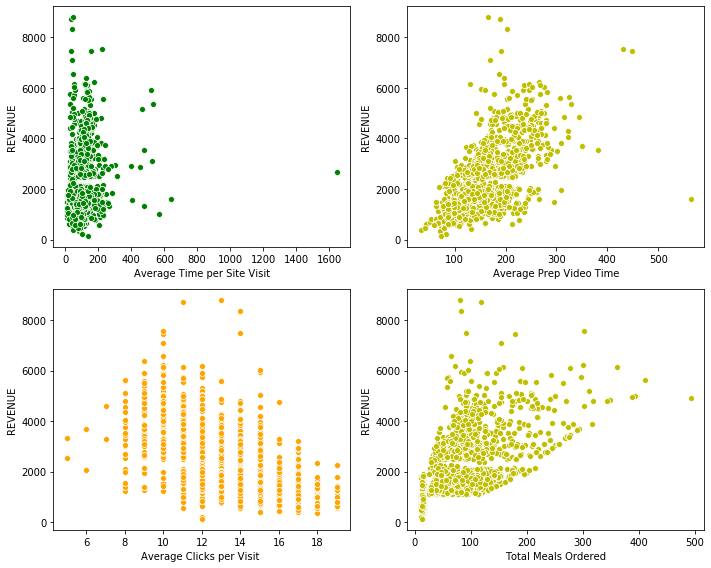

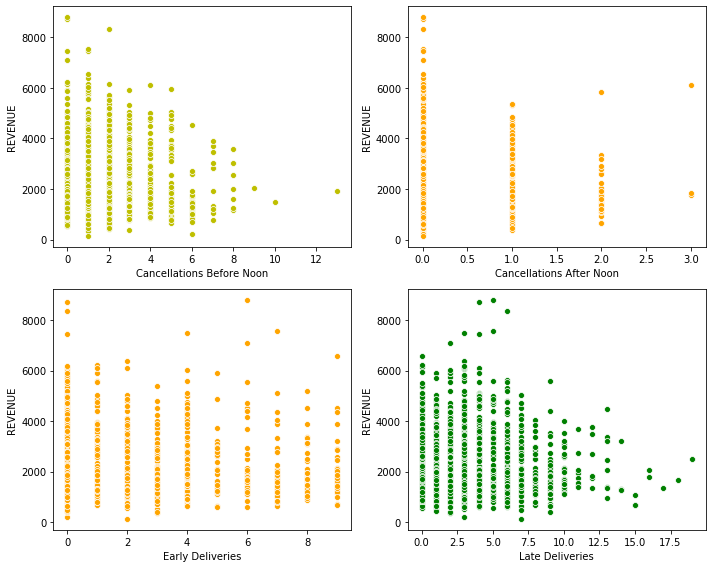

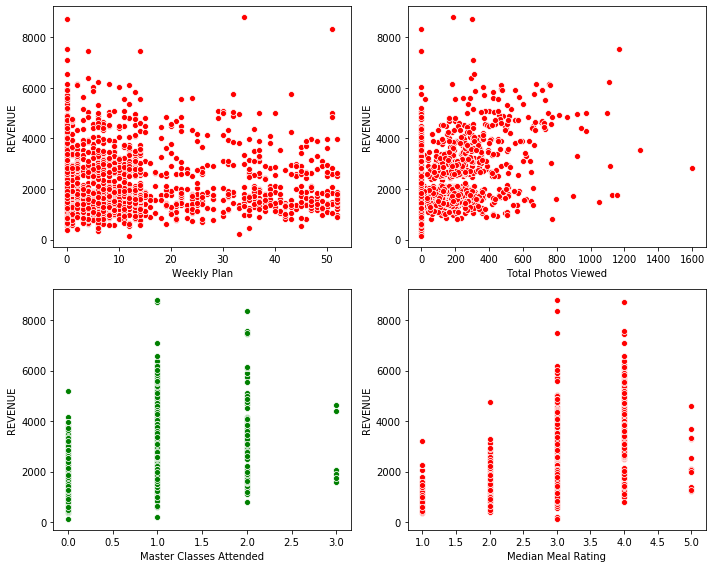

In [7]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Average Time per Site Visit')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Average Prep Video Time')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Average Clicks per Visit ')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Total Meals Ordered')
plt.tight_layout()
plt.show()

########################
########################


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CANCELLATIONS_BEFORE_NOON'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Cancellations Before Noon')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Cancellations After Noon')

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['EARLY_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Early Deliveries')

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['LATE_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Late Deliveries')

plt.tight_layout()
plt.show()



########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'r')

plt.xlabel('Weekly Plan')


plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Total Photos Viewed')


plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['MASTER_CLASSES_ATTENDED'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Master Classes Attended')

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['MEDIAN_MEAL_RATING'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Median Meal Rating')


plt.tight_layout()
plt.show()

In [8]:
# refine thredhold 
avg_time_pvisit_change_hi  = 300
avg_prep_vid_time_change_hi = 300
tot_meals_ord_change_hi = 250

cancel_b_noon_change_at = 0
cancel_a_noon_change_at = 0
weekly_plan_change_at = 0
tot_photo_v_change_at = 0
fol_recomm_pct_change_at = 0
mas_class_att_change_at_1 = 1
mas_class_att_change_at_2 = 2
med_meal_rat_change_at_3 =  3
med_meal_rat_change_at_4 =  4

In [9]:
# greater than sign

# Average Time per Visit
chef['change_ave_time_pvisit'] = 0
condition = chef.loc[0:,'change_ave_time_pvisit'][chef['AVG_TIME_PER_SITE_VISIT'] > avg_time_pvisit_change_hi]

chef['change_ave_time_pvisit'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# Average Prep Video Time
chef['change_ave_prep_vid'] = 0
condition = chef.loc[0:,'change_ave_prep_vid'][chef['AVG_PREP_VID_TIME'] > avg_prep_vid_time_change_hi]

chef['change_ave_prep_vid'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# Total Meal Ordered
chef['change_tot_meals_ord'] = 0

condition = chef.loc[0:,'change_tot_meals_ord'][chef['TOTAL_MEALS_ORDERED'] > tot_meals_ord_change_hi]

chef['change_tot_meals_ord'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)



########################################
## change at threshold                ##
########################################

# double-equals sign

# Cancellation before Noon
chef['change_cancel_bnoon'] = 0
condition = chef.loc[0:,'change_cancel_bnoon'][chef['CANCELLATIONS_BEFORE_NOON'] == cancel_b_noon_change_at]

chef['change_cancel_bnoon'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


# Cancellation after Noon
chef['change_cancel_anoon'] = 0
condition = chef.loc[0:,'change_cancel_anoon'][chef['CANCELLATIONS_AFTER_NOON'] == cancel_a_noon_change_at]

chef['change_cancel_anoon'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Weekly Plan
chef['change_week_plan'] = 0
condition = chef.loc[0:,'change_week_plan'][chef['WEEKLY_PLAN'] == weekly_plan_change_at]

chef['change_week_plan'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)




# Total Photo Viewed
chef['change_tot_photov'] = 0
condition = chef.loc[0:,'change_tot_photov'][chef['TOTAL_PHOTOS_VIEWED'] == tot_photo_v_change_at]

chef['change_tot_photov'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


#Followed Recommendation Percentage 
chef['change_fol_rec_pct'] = 0
condition = chef.loc[0:,'change_fol_rec_pct'][chef['FOLLOWED_RECOMMENDATIONS_PCT'] == fol_recomm_pct_change_at]

chef['change_fol_rec_pct'].replace(to_replace = condition,
                                     value      = 1,
                                     inplace    = True)



#Master Classes Attended 
chef['change_mas_classa_1'] = 0
condition = chef.loc[0:,'change_mas_classa_1'][chef['MASTER_CLASSES_ATTENDED'] == mas_class_att_change_at_1]

chef['change_mas_classa_1'].replace(to_replace = condition,
                                     value      = 1,
                                     inplace    = True)

chef['change_mas_classa_2'] = 0
condition = chef.loc[0:,'change_mas_classa_2'][chef['MASTER_CLASSES_ATTENDED'] == mas_class_att_change_at_2]

chef['change_mas_classa_2'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)



#Median Meals Rating
chef['change_med_mealr_3'] = 0
condition = chef.loc[0:,'change_med_mealr_3'][chef['MEDIAN_MEAL_RATING'] == med_meal_rat_change_at_3]

chef['change_med_mealr_3'].replace(to_replace = condition,
                                      value   = 1,
                                      inplace = True)   

chef['change_med_mealr_4'] = 0
condition = chef.loc[0:,'change_med_mealr_4'][chef['MEDIAN_MEAL_RATING'] == med_meal_rat_change_at_4]

chef['change_med_mealr_4'].replace(to_replace = condition,
                                     value      = 1,
                                     inplace    = True)

In [10]:
# create new log variable for average time per site visit which is highly skew
chef['log_avg_tps_visit'] = np.log(chef['AVG_TIME_PER_SITE_VISIT'])

Create new variable to check if customers who order beverage. 
Max price of meal set is USD23.
If the average price of meals set higher than USD23, we could assume that customer purchase beverage besides meals

In [11]:
chef['extra_beverage']= np.where(chef['REVENUE']/chef['TOTAL_MEALS_ORDERED']>23, 1, 0)

 <h5> Categorical Variables </h5>

In [12]:
# handling email domains

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)



In [13]:
# renaming column to concatenate
email_df.columns= ['id', 'email_domain']


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df.loc[:, 'email_domain']],axis =1)


In [14]:
chef['email_domain'].unique()

array(['passport.com', 'jnj.com', 'gmail.com', 'ibm.com',
       'goldmansacs.com', 'homedepot.com', 'yahoo.com', 'caterpillar.com',
       'protonmail.com', 'live.com', 'aol.com', 'msn.com', 'verizon.com',
       'hotmail.com', 'merck.com', 'unitedtech.com', 'nike.com',
       'unitedhealth.com', 'mcdonalds.com', 'pg.com', 'mmm.com', 'me.com',
       'apple.com', 'cisco.com', 'travelers.com', 'cocacola.com',
       'jpmorgan.com', 'chevron.com', 'amex.com', 'dupont.com',
       'boeing.com', 'exxon.com', 'intel.com', 'ge.org', 'disney.com',
       'microsoft.com', 'pfizer.com', 'visa.com', 'walmart.com'],
      dtype=object)

In [15]:
# email domain types
professional_email_domains = [ '@jnj.com',  '@ibm.com',
       '@goldmansacs.com', '@homedepot.com','@caterpillar.com',
         '@verizon.com', '@merck.com', '@unitedtech.com', '@nike.com',
       '@unitedhealth.com', '@mcdonalds.com', '@pg.com', '@mmm.com',
       '@apple.com', '@cisco.com', '@travelers.com', '@cocacola.com',
       '@jpmorgan.com', '@chevron.com', '@amex.com', '@dupont.com',
       '@boeing.com', '@exxon.com', '@intel.com', '@ge.org', '@disney.com',
       '@microsoft.com', '@pfizer.com', '@visa.com', '@walmart.com']
personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com','@passport.com']

# placeholder list
placeholder_lst2 = []


# looping to group observations by domain type
for domain in chef['email_domain']:
        if '@' + domain in professional_email_domains:
            placeholder_lst2.append('professional')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst2.append('personal')
            
        elif '@' + domain in junk_email_domains:
            placeholder_lst2.append('junk')
                        
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst2)


# checking results
chef['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [16]:
# one hot encoding categorical variables
one_hot_domain       = pd.get_dummies(chef['domain_group'])


# dropping categorical variables after they've been encoded
chef = chef.drop('domain_group', axis = 1)

# joining codings together
chef = chef.join([one_hot_domain])

<h4><b> Initiate Linear Regression Full Modeling </h4><b>

In [17]:
# creating a (Pearson) correlation matrix
chef_corr = chef.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(chef_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                         1.00
AVG_PREP_VID_TIME               0.64
MEDIAN_MEAL_RATING              0.61
TOTAL_MEALS_ORDERED             0.60
change_med_mealr_4              0.59
TOTAL_PHOTOS_VIEWED             0.47
MASTER_CLASSES_ATTENDED         0.45
LARGEST_ORDER_SIZE              0.44
change_mas_classa_1             0.33
out_tot_meals                   0.30
change_tot_meals_ord            0.27
out_tot_photo                   0.26
change_mas_classa_2             0.22
change_ave_prep_vid             0.19
out_uni_meals                   0.17
log_avg_tps_visit               0.15
AVG_TIME_PER_SITE_VISIT         0.14
out_avg_prep_video              0.10
CONTACTS_W_CUSTOMER_SERVICE     0.10
out_avg_clicks_pvisit           0.09
change_ave_time_pvisit          0.07
out_avg_time_pvisit             0.06
out_meals_rating                0.04
change_cancel_anoon             0.04
extra_beverage                  0.04
MOBILE_NUMBER                   0.03
change_week_plan                0.03
P

In [18]:
# saving feature-rich dataset in Excel
chef.to_excel('chef_feature_rich.xlsx',
                 index = False)

In [19]:
# making a copy of housing
chef_explanatory = chef.copy()


# dropping SalePrice and Order from the explanatory variable set
chef_explanatory = chef.drop(['REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'email_domain'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in chef_explanatory:
    print(f"chef['{val}'] +")

chef['CROSS_SELL_SUCCESS'] +
chef['TOTAL_MEALS_ORDERED'] +
chef['UNIQUE_MEALS_PURCH'] +
chef['CONTACTS_W_CUSTOMER_SERVICE'] +
chef['PRODUCT_CATEGORIES_VIEWED'] +
chef['AVG_TIME_PER_SITE_VISIT'] +
chef['MOBILE_NUMBER'] +
chef['CANCELLATIONS_BEFORE_NOON'] +
chef['CANCELLATIONS_AFTER_NOON'] +
chef['TASTES_AND_PREFERENCES'] +
chef['MOBILE_LOGINS'] +
chef['PC_LOGINS'] +
chef['WEEKLY_PLAN'] +
chef['EARLY_DELIVERIES'] +
chef['LATE_DELIVERIES'] +
chef['PACKAGE_LOCKER'] +
chef['REFRIGERATED_LOCKER'] +
chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef['AVG_PREP_VID_TIME'] +
chef['LARGEST_ORDER_SIZE'] +
chef['MASTER_CLASSES_ATTENDED'] +
chef['MEDIAN_MEAL_RATING'] +
chef['AVG_CLICKS_PER_VISIT'] +
chef['TOTAL_PHOTOS_VIEWED'] +
chef['out_avg_time_pvisit'] +
chef['out_avg_prep_video'] +
chef['out_avg_clicks_pvisit'] +
chef['out_tot_meals'] +
chef['out_uni_meals'] +
chef['out_contact_CS'] +
chef['out_cancel_bnoon'] +
chef['out_cancel_anoon'] +
chef['out_mobile_log'] +
chef['out_pc_log'] +
chef['out_weekly_p

In [20]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """ chef['REVENUE'] ~ chef['CROSS_SELL_SUCCESS'] +
                                chef['TOTAL_MEALS_ORDERED'] +
                                chef['UNIQUE_MEALS_PURCH'] +
                                chef['CONTACTS_W_CUSTOMER_SERVICE'] +
                                chef['PRODUCT_CATEGORIES_VIEWED'] +
                                chef['AVG_TIME_PER_SITE_VISIT'] +
                                chef['MOBILE_NUMBER'] +
                                chef['CANCELLATIONS_BEFORE_NOON'] +
                                chef['CANCELLATIONS_AFTER_NOON'] +
                                chef['TASTES_AND_PREFERENCES'] +
                                chef['MOBILE_LOGINS'] +
                                chef['PC_LOGINS'] +
                                chef['WEEKLY_PLAN'] +
                                chef['EARLY_DELIVERIES'] +
                                chef['LATE_DELIVERIES'] +
                                chef['PACKAGE_LOCKER'] +
                                chef['REFRIGERATED_LOCKER'] +
                                chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                chef['AVG_PREP_VID_TIME'] +
                                chef['LARGEST_ORDER_SIZE'] +
                                chef['MASTER_CLASSES_ATTENDED'] +
                                chef['MEDIAN_MEAL_RATING'] +
                                chef['AVG_CLICKS_PER_VISIT'] +
                                chef['TOTAL_PHOTOS_VIEWED'] +
                                chef['change_ave_time_pvisit'] +
                                chef['change_ave_prep_vid'] +
                                chef['change_tot_meals_ord'] +
                                chef['change_cancel_bnoon'] +
                                chef['change_cancel_anoon'] +
                                chef['change_week_plan'] +
                                chef['change_tot_photov'] +
                                chef['change_fol_rec_pct'] +
                                chef['change_mas_classa_1'] +
                                chef['change_mas_classa_2'] +
                                chef['change_med_mealr_3'] +
                                chef['change_med_mealr_4'] +
                                chef['log_avg_tps_visit'] +
                                chef['extra_beverage'] +
                                chef['junk'] +
                                chef['personal'] +
                                chef['professional'] +
                                chef['out_avg_time_pvisit'] +
                                chef['out_avg_prep_video'] +
                                chef['out_avg_clicks_pvisit'] +
                                chef['out_tot_meals'] +
                                chef['out_uni_meals'] +
                                chef['out_contact_CS'] +
                                chef['out_cancel_bnoon'] +
                                chef['out_cancel_anoon'] +
                                chef['out_mobile_log'] +
                                chef['out_pc_log'] +
                                chef['out_weekly_plan'] +
                                chef['out_early_d'] +
                                chef['out_late_d'] +
                                chef['out_tot_photo'] +
                                chef['out_lar_order'] +
                                chef['out_master_class'] +
                                chef['out_meals_rating']""",
                                data = chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        chef['REVENUE']   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     102.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:25:35   Log-Likelihood:                -15095.
No. Observations:                1946   AIC:                         3.030e+04
Df Residuals:                    1889   BIC:                         3.062e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             -303.7052    368.820     -0.823      0.410   -1027.042     419.632
chef['CROSS_SELL_SUCCESS']             -86.7773     34.751     -2.497      0.013    -154.931     -18.623
chef['TOTAL_MEALS_ORDERED']             13.3684      0.498     26.850      0.000      12.392      14.345
chef['UNIQUE_MEALS_PURCH']             -59.2832      5.635    -10.520      0.000     -70.335     -48.231
chef['CONTACTS_W_CUSTOMER_SERVICE']     10.3967      6.327      1.643      0.100      -2.011      22.805
chef['PRODUCT_CATEGORIES_VIEWED']        2.9886      4.371      0.684      0.494      -5.584      11.562
chef['AVG_TIME_PER_SITE_VISIT']          0.4018      0.487      0.825      0.410      -0.554       1.357
chef['MOBILE_NUMBER']                   37.3445     40.542      0.921      0.357     -42.168     116.857
chef['CANCELLATIONS_BEFORE_NOON']        4.8506     14.478      0.335      0.738     -23.544      33.245
chef['CANCELLATIONS_AFTER_NOON']       321.1159    350.247      0.917      0.359    -365.796    1008.027
chef['TASTES_AND_PREFERENCES']          11.7518     29.328      0.401      0.689     -45.766      69.270
chef['MOBILE_LOGINS']                   31.1338     22.753      1.368      0.171     -13.490      75.758
chef['PC_LOGINS']                      -29.6923     25.131     -1.181      0.238     -78.980      19.596
chef['WEEKLY_PLAN']                     -0.2242      1.236     -0.181      0.856      -2.648       2.200
chef['EARLY_DELIVERIES']                -0.4798      6.294     -0.076      0.939     -12.824      11.864
chef['LATE_DELIVERIES']                  4.4827      5.546      0.808      0.419      -6.395      15.361
chef['PACKAGE_LOCKER']                 -10.7674     31.440     -0.342      0.732     -72.429      50.894
chef['REFRIGERATED_LOCKER']            -14.6277     47.486     -0.308      0.758    -107.758      78.503
chef['FOLLOWED_RECOMMENDATIONS_PCT']     0.2442      0.630      0.388      0.698      -0.991       1.480
chef['AVG_PREP_VID_TIME']                7.4717      0.582     12.841      0.000       6.331       8.613
chef['LARGEST_ORDER_SIZE']             -78.8810     15.173     -5.199      0.000    -108.638     -49.124
chef['MASTER_CLASSES_ATTENDED']          1.3237     50.769      0.026      0.979     -98.245     100.893
chef['MEDIAN_MEAL_RATING']             167.4177     68.781      2.434      0.015      32.522     302.313
chef['AVG_CLICKS_PER_VISIT']             0.7018     11.528      0.061      0.951     -21.907      23.310
chef['TOTAL_PHOTOS_VIEWED']              0.3340      0.152      2.198      0.028       0.036       0.632
chef['change_ave_time_pvisit']          87.6145    224.805      0.390      0.697    -353.278     528.507
chef['change_ave_prep_vid']           

<h4><b>Final Modeling Building </h4><b>
<h5> Import Package and Load Dataset</h5>

In [1]:
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
#from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'chef_feature_rich.xlsx'


# reading the file into Python
chef = pd.read_excel(file)



I assume that the modeling will be more accurate when using logarithm transform of responsible variable REVENUE which is highly skewed

<h5> Split Train and Test Sets</h5>

In [2]:
# preparing explanatory variable data
chef_data   = chef.drop(['REVENUE',
                         'NAME',
                         'EMAIL',
                         'FIRST_NAME',
                         'FAMILY_NAME',
                         'email_domain'],
                          axis = 1)


# preparing response variable data
chef_target = chef.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 222)


<h5> Identify Significant Variables to Build Liner Regression Modeling</h5>

In [3]:
x_variables = ['AVG_PREP_VID_TIME','MASTER_CLASSES_ATTENDED',
              'TOTAL_MEALS_ORDERED', 'LARGEST_ORDER_SIZE', 
              'UNIQUE_MEALS_PURCH', 'change_tot_meals_ord',
              'TOTAL_PHOTOS_VIEWED',
               'change_med_mealr_4', 'log_avg_tps_visit','out_master_class',
               'extra_beverage','out_tot_meals','out_lar_order',
               'MEDIAN_MEAL_RATING']

for val in x_variables:
    print(f"chef_train['{val}'] +")

chef_train['AVG_PREP_VID_TIME'] +
chef_train['MASTER_CLASSES_ATTENDED'] +
chef_train['TOTAL_MEALS_ORDERED'] +
chef_train['LARGEST_ORDER_SIZE'] +
chef_train['UNIQUE_MEALS_PURCH'] +
chef_train['change_tot_meals_ord'] +
chef_train['TOTAL_PHOTOS_VIEWED'] +
chef_train['change_med_mealr_4'] +
chef_train['log_avg_tps_visit'] +
chef_train['out_master_class'] +
chef_train['extra_beverage'] +
chef_train['out_tot_meals'] +
chef_train['out_lar_order'] +
chef_train['MEDIAN_MEAL_RATING'] +


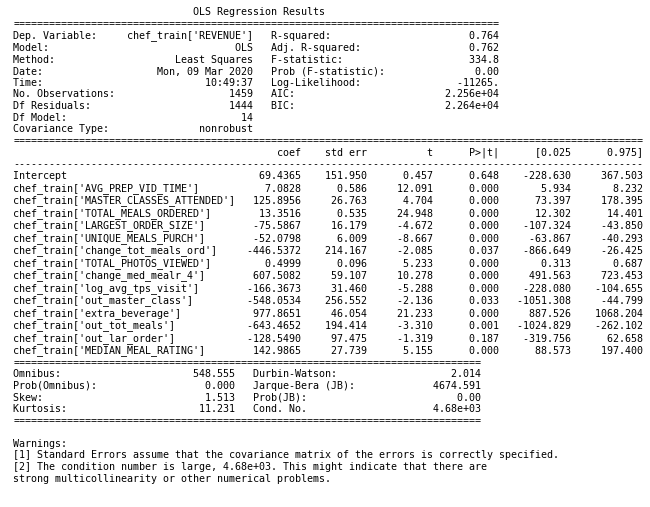

In [8]:
# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """chef_train['REVENUE'] ~ 
                                chef_train['AVG_PREP_VID_TIME'] +
                                chef_train['MASTER_CLASSES_ATTENDED'] +
                                chef_train['TOTAL_MEALS_ORDERED'] +
                                chef_train['LARGEST_ORDER_SIZE'] +
                                chef_train['UNIQUE_MEALS_PURCH'] +
                                chef_train['change_tot_meals_ord'] +
                                chef_train['TOTAL_PHOTOS_VIEWED'] +
                                chef_train['change_med_mealr_4'] +
                                chef_train['log_avg_tps_visit'] +
                                chef_train['out_master_class'] +
                                chef_train['extra_beverage'] +
                                chef_train['out_tot_meals'] +
                                chef_train['out_lar_order'] +
                                chef_train['MEDIAN_MEAL_RATING'] """,
                                         data = chef_train)  


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
#print(results.summary())

plt.rc('figure', figsize=(10, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

<h5> Testing Several Scikit-learn Modelings to Locate Final Optimal Model</h5>

In [26]:
# applying modelin scikit-learn

# preparing x-variables
chef_data = ['AVG_PREP_VID_TIME','MASTER_CLASSES_ATTENDED',
              'TOTAL_MEALS_ORDERED', 'LARGEST_ORDER_SIZE', 
              'UNIQUE_MEALS_PURCH', 'change_tot_meals_ord',
              'TOTAL_PHOTOS_VIEWED',
               'change_med_mealr_4', 'log_avg_tps_visit','out_master_class',
               'extra_beverage','out_tot_meals','out_lar_order',
               'MEDIAN_MEAL_RATING']


# preparing response variable
chef_target = ['log_revenue']

# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(chef[chef_data], 
                                                   chef[chef_target],
                                                   test_size = 0.25,
                                                   random_state =222)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

names=[]
train_scores =[]
test_scores =[]

models={'OLS': LinearRegression(),
       'Ridge': Ridge(),
       'Lasso': Lasso(),
       'ElasticN': ElasticNet(),
       'GBReg': GradientBoostingRegressor()}

for name, model in models.items():
    name_model = model
    name_fit = name_model.fit(X_train, y_train)
    name_pred = name_model.predict(X_test)
    name_train_score = name_model.score(X_train, y_train).round(4)
    name_test_score = name_model.score(X_test, y_test).round(4)
    names.append(name)
    train_scores.append(name_train_score)
    test_scores.append(name_test_score)
    
score_df = pd.DataFrame({'Modeal Name': names, 
                         'Train Score': train_scores, 
                         'Test Score' : test_scores})
score_df

C:\Users\linca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Modeal Name,Train Score,Test Score
0,OLS,0.7621,0.7198
1,Ridge,0.7621,0.7200
2,Lasso,0.5480,0.5241
3,ElasticN,0.5496,0.5279
4,GBReg,0.9170,0.8599


<h5> Final Model Score</h5>
<br>Test Score = 0.8599 (Gradient Boosting Regression Model)</br>